### Pair Programming Estadística IV

In [34]:
# Importamos las librerías necesarias:

import numpy as np
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas
import matplotlib.pyplot as plt # importando matplotlib
import seaborn as sns
from scipy.stats import skew
import scipy.stats as st

In [35]:
# Abrimos el archivo que vamos a usar:

df = pd.read_csv('04-maskbeliefs.csv', index_col = 0)

In [36]:
df.head(15)

,Boarding,Age,Gender,ResidentialElder,InteractedElder,Restaurant,PreventSpread,Reason,Public
Timestamp,,,,,,,,,
9/25/2020 15:04:43,Day,16,Female,No,Yes,1.0,Yes,To protect yourself AND others,Yes
9/25/2020 15:04:46,Boarding,17,Male,No,No,2.0,Yes,To protect yourself AND others,Yes
9/25/2020 15:04:58,Boarding,17,Male,No,Yes,0.0,Yes,To protect yourself AND others,Yes
9/25/2020 15:05:12,Day,17,Female,No,Yes,2.0,Yes,To protect yourself AND others,Yes
9/25/2020 15:05:12,Day,17,Female,No,Yes,2.0,Yes,To protect yourself AND others,Yes
9/25/2020 15:05:15,Boarding,18,Male,No,No,0.0,Yes,To protect other people,No
9/25/2020 15:05:22,Day,18,Male,No,Yes,3.0,Yes,To protect other people,Yes
9/25/2020 15:05:30,Day,18,Male,No,Yes,0.0,Yes,Because you are required to,Yes
9/25/2020 15:05:33,Day,17,Female,No,Yes,1.0,Yes,To protect other people,Yes


Renombramos las columnas:

In [37]:
lista_columnas = {col: col.strip().replace(" ", "_").lower() for col in df.columns}
df.rename(columns=lista_columnas, inplace=True)
df.head(2)

,boarding,age,gender,residentialelder,interactedelder,restaurant,preventspread,reason,public
Timestamp,,,,,,,,,
9/25/2020 15:04:43,Day,16,Female,No,Yes,1.0,Yes,To protect yourself AND others,Yes
9/25/2020 15:04:46,Boarding,17,Male,No,No,2.0,Yes,To protect yourself AND others,Yes


In [38]:
print("El dataframe tiene filas y columnas, respectivamente:", df.shape)

El dataframe tiene filas y columnas, respectivamente: (107, 9)


In [39]:
df.isnull().sum()

boarding            0
age                 0
gender              1
residentialelder    0
interactedelder     0
restaurant          2
preventspread       0
reason              0
public              0
dtype: int64

In [40]:
print("El dataframe tiene", df.duplicated().sum(), "duplicados.")

El dataframe tiene 18 duplicados.


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 9/25/2020 15:04:43 to 9/29/2020 9:56:52
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   boarding          107 non-null    object 
 1   age               107 non-null    int64  
 2   gender            106 non-null    object 
 3   residentialelder  107 non-null    object 
 4   interactedelder   107 non-null    object 
 5   restaurant        105 non-null    float64
 6   preventspread     107 non-null    object 
 7   reason            107 non-null    object 
 8   public            107 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 8.4+ KB


In [42]:
df.columns

Index(['boarding', 'age', 'gender', 'residentialelder', 'interactedelder',
       'restaurant', 'preventspread', 'reason', 'public'],
      dtype='object')

In [43]:
df.columns = ['embarque',
                'edad',
                'genero',
                'reside_con_anciano',
                'interactua_con_anciano',
                'restaurante',
                'prevenir_la_propagacion',
                'razon',
                'publico']

In [44]:
df.columns

Index(['embarque', 'edad', 'genero', 'reside_con_anciano',
       'interactua_con_anciano', 'restaurante', 'prevenir_la_propagacion',
       'razon', 'publico'],
      dtype='object')

Traducimos los términos al español:

In [45]:
df.shape

(107, 9)

In [46]:
# Cuantitativas:

edad = df['edad']
restaurante = df['restaurante']


In [47]:
# Cualitativas:

genero = df['genero']
reside = df['reside_con_anciano']
prevenir = df['prevenir_la_propagacion']

Plantead una serie de preguntas como las que fuimos contestando en la clase invertida.

Contestad a las preguntas planteadas usando los principales estadísticos que hemos aprendid 
y gráficas que mejor se ajusten.

Preguntas:

- ¿Quién previene más la enfermedad por genero? 

In [48]:
df_p=df.groupby('genero')['prevenir_la_propagacion'].count()
df_p

genero
Female    58
Male      46
Other      2
Name: prevenir_la_propagacion, dtype: int64

Las mujeres.

- ¿Y por edad?

In [49]:
df_e = df.groupby('edad')['prevenir_la_propagacion'].count()
df_e

edad
12     1
14    13
15    23
16    30
17    29
18    11
Name: prevenir_la_propagacion, dtype: int64

Las personas de 16 años.

¿Piensan los jóvenes que las mascarillas previenen de verdad?

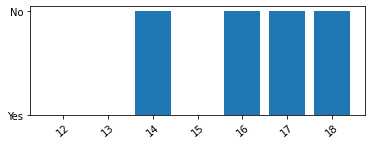

In [50]:
plt.figure(figsize=(6,2))
plt.bar(edad, prevenir)
plt.xticks(rotation=40)
plt.show;

Hacemos un boxplot para ver la relación entre la edad y la prevención:

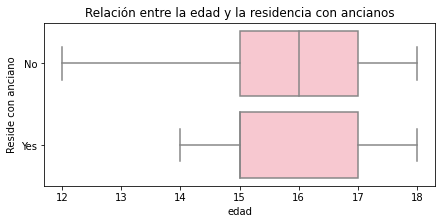

In [51]:
plt.figure(figsize =(7,3))
fig = sns.boxplot(x = edad, y = reside, color =  "pink")
fig.set(xlabel = "edad", ylabel = "Reside con anciano")
fig.set_title("Relación entre la edad y la residencia con ancianos")
plt.show()

In [52]:
media = np.mean(edad)
print (f'La media de edad es {media}')

La media de edad es 15.981308411214954


In [53]:
moda, frecuencia = stats.mode(edad)
print (f'La moda y la frecuencia son {moda, frecuencia}')

La moda y la frecuencia son (array([16]), array([30]))


ValueError: Could not interpret input 'job_title'

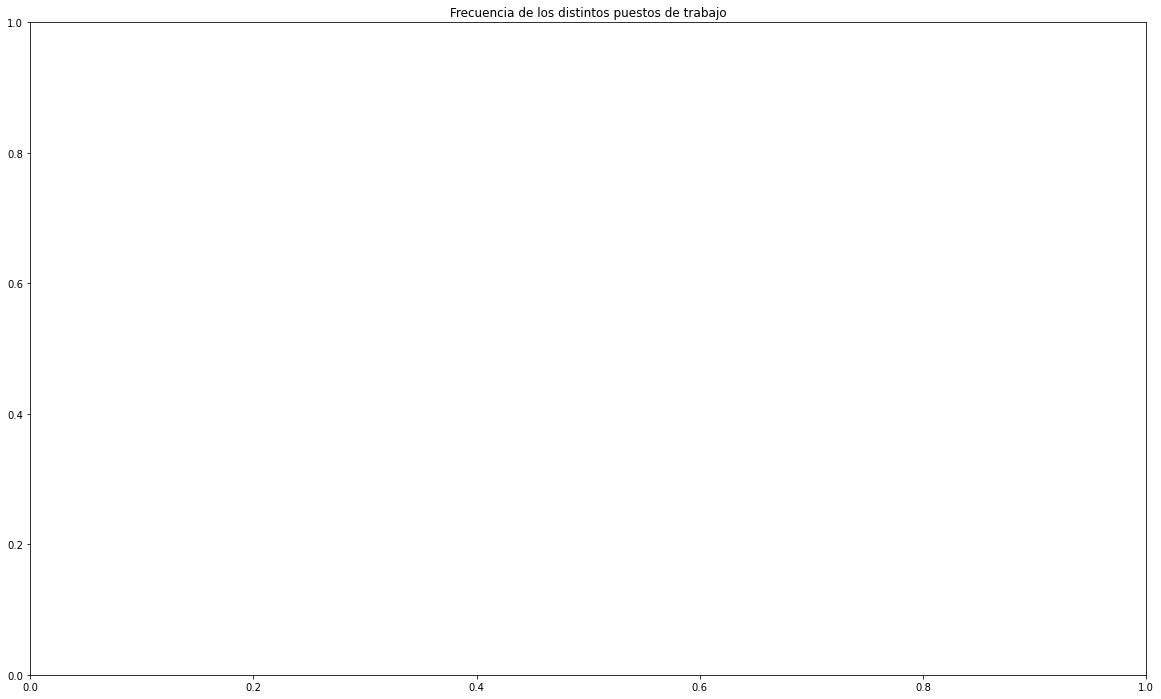

In [54]:
# Vamos a hacer un countplot para visualizarlo:

fig, ax = plt.subplots(figsize=(20, 12))

plt.title('Frecuencia de los distintos puestos de trabajo')
sns.countplot(x = 'job_title', data= df)
ax.set_xticklabels(labels = ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [55]:
data_crosstab = pd.crosstab(genero, 
                            prevenir) 
print(data_crosstab) 

prevenir_la_propagacion  No  Yes
genero                          
Female                    5   53
Male                      2   44
Other                     0    2


De lo que deducimos que mas mujeres previenen la enfermedad.

In [56]:
skewness = skew(edad)
print(skewness)

-0.31928907046294486


Con este numero podemos decir que nuestros datos estan sesgados a la izquierda, aunque si vemos los datos, en realidad, no es asi, es que solo tenemos edades bajas.

In [57]:
intervalo =(st.t.interval(alpha=0.65, df=len(edad)-1, loc=np.mean(edad), scale=st.sem(edad)))

In [58]:
print(f'Nuestro intervalo de confianza al 95% es{intervalo}',
f'La media de edad es {media}',
('Lo que nos indica que esta media esta dentro de nuestro intervalo'),
f'La moda de nuestros datos es {moda}')

Nuestro intervalo de confianza al 95% es(15.868440246028253, 16.094176576401654) La media de edad es 15.981308411214954 Lo que nos indica que esta media esta dentro de nuestro intervalo La moda de nuestros datos es [16]
